In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import qgrid
import seaborn as sns

In [70]:
files = {"all": "../../explanations-for-ner-train-finnish-20190114-total.txt",
        "only_target_entities": "../../explanations-for-ner-train-finnish-20190115-total-only_target_entities.txt",
        "finnish_model_10_size": {"explanations": "../../explanations-for-ner-train-finnish_model_10_size.txt",
                                   "raw_data": "../../regression-data-for-ner-train-finnish_model_10_size.txt"},
        "finnish_model_100_size": {"explanations": "explanations-for-ner-train-finnish_model_100_size.txt",
                                   "raw_data": "regression-data-for-ner-train-finnish_model_100_size.txt",
                                  "id_to_morpho_tag": "id_to_morpho_tag-for-ner-train-finnish_model_100_size.txt"}, 
        "turkish_model_100_size": {"explanations": "explanations-for-ner-train-turkish_model_100_size.txt",
                                  "raw_data": "regression-data-for-ner-train-turkish_model_100_size.txt",
                                  "id_to_morpho_tag": "id_to_morpho_tag-for-ner-train-turkish_model_100_size.txt"}}

In [3]:
%ls 

Explanations Analysis - Probs Development 20190203.ipynb
Explanations Analysis - Run 03 - 20190204.ipynb
Explanations Analysis Run 01.ipynb
Explanations Analysis Run 02 - Finnish.ipynb
Explanations Analysis Run 02 - Turkish.ipynb
__init__.py
__pycache__/
explanations-for-ner-train-finnish_model_100_size.txt
explanations-for-ner-train-turkish_model_100_size.txt
id_to_morpho_tag-for-ner-train-finnish_model_100_size.txt
id_to_morpho_tag-for-ner-train-turkish_model_100_size.txt
main.py
regression-data-for-ner-train-finnish_model_100_size.txt
regression-data-for-ner-train-turkish_model_100_size.txt
run-01/
run-02/
run-03/


In [4]:
lines = []
records = []
with open(files["finnish_model_100_size"]["explanations"], "r") as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.strip().split("\t")
        record = [int(tokens[0]), tokens[1], tuple([int(x) for x in tokens[2].split(" ")])]
        record.append({k: float(v) for k, v in [tuple(x.split(" ")) for x in tokens[3:]]})
        records.append(record)

In [5]:
records[0]

[2,
 'ORG',
 (7, 8),
 {'Case=Nom': -0.009883502524801774,
  'Number=Sing': -0.0037390832717981723,
  '*UNKNOWN*': 0.0012383267944358308,
  'Tense=Pres': 0.0012383267944358304,
  'Voice=Act': 0.0012383267944358302,
  'Person=3': 0.0012383267944358302,
  'Case=Par': 0.0012383267944358302,
  'VerbForm=Inf': 0.0012383267944358302,
  'InfForm=1': 0.0012383267944358302,
  'Mood=Ind': 0.00123832679443583,
  'VerbForm=Fin': 0.0012383267944358295}]

In [6]:
list(record[3].values())

[-0.002963836306919314, 0.0017129886085895862, 0.00041683803149359516]

In [7]:
def log_sum_exp(input_x):
    max_value = np.max(input_x)
    return np.log(np.sum([np.exp(x-max_value) for x in input_x])) + max_value

log_sum_exp([1, 2])

2.313261687518223

In [8]:
np.logaddexp(*[1, 2])

2.313261687518223

In [9]:
group_by_entity_type = {}
for record in records:
    entity_type = record[1]
    if entity_type not in group_by_entity_type:
        group_by_entity_type[entity_type] = {}
    if entity_type in group_by_entity_type:
        # sum_weights = log_sum_exp(list(record[3].values()))
#         min_value = np.min(list(record[3].values()))
#         max_value = np.max(list(record[3].values()))
        for morpho_tag, weight in record[3].items():
#             value = np.exp(weight - sum_weights)
#             value = (weight-min_value)/float(max_value-min_value)
            value = weight
            if morpho_tag in group_by_entity_type[entity_type]:
                group_by_entity_type[entity_type][morpho_tag].append(value)
            else:
                group_by_entity_type[entity_type][morpho_tag] = [value]

In [10]:
group_by_entity_type.keys()

dict_keys(['ORG', 'TIT', 'PER', 'TIM', 'LOC', 'DATE', 'PRO', 'MISC', 'EVENT', 'OUTSIDE'])

In [11]:
group_by_entity_type['ORG'].keys()

dict_keys(['Case=Nom', 'Number=Sing', '*UNKNOWN*', 'Tense=Pres', 'Voice=Act', 'Person=3', 'Case=Par', 'VerbForm=Inf', 'InfForm=1', 'Mood=Ind', 'VerbForm=Fin', 'Case=Ill', 'Degree=Pos', 'Case=Gen', 'Voice=Pass', 'Case=Ela', 'Mood=Imp', 'Person=2', 'VerbForm=Part', 'PartForm=Past', 'Typo=Yes', 'Number=Plur', 'Case=Ins', 'Foreign=Yes', 'NumType=Ord', 'Tense=Past', 'Person=1', 'PronType=Ind', 'InfForm=2', 'Abbr=Yes', 'Derivation=Lainen', 'Derivation=Minen', 'Derivation=Inen', 'Connegative=Yes', 'Case=Abl', 'NumType=Card', 'AdpType=Post', 'Case=All', 'Style=Coll', 'Case=Ine', 'Degree=Sup', 'Mood=Pot', 'AdpType=Prep', 'PronType=Prs', 'Clitic=Kin', 'PronType=Dem', 'Case=Ess', 'Case=Ade', 'Person=0', 'Polarity=Neg', 'Clitic=Ko,S', 'Person[psor]=3', 'PronType=Rel', 'PartForm=Agt', 'Mood=Cnd', 'PronType=Int', 'Person[psor]=1', 'Number[psor]=Plur', 'InfForm=3', 'PartForm=Pres', 'Number[psor]=Sing', 'Degree=Cmp', 'Derivation=Sti', 'Derivation=Ton', 'Clitic=S', 'Person[psor]=2', 'Clitic=Han', 'Clit

In [12]:
stats_by_entity_type = {key: dict() for key in group_by_entity_type.keys()}
for entity_type in stats_by_entity_type.keys():
    for morpho_tag in group_by_entity_type[entity_type]:
        l = group_by_entity_type[entity_type][morpho_tag]
        stats_by_entity_type[entity_type][morpho_tag] = (np.mean(l), len(l))

In [13]:
for entity_type in stats_by_entity_type.keys():
    sorted_l = sorted(stats_by_entity_type[entity_type].items(), key=lambda x: np.abs(x[1][0]), reverse=True)
    print(entity_type, sorted_l[:10])

ORG [('Clitic=Kaan', (0.04344976695925165, 3)), ('Mood=Cnd', (-0.010651135894503772, 22)), ('Case=Ade', (-0.00752013532127604, 213)), ('Case=Ine', (-0.006478006558828299, 113)), ('Clitic=Han', (-0.006413305792218497, 4)), ('Clitic=Kin', (0.005953620458215773, 93)), ('PronType=Rel', (-0.005505293609185099, 21)), ('Case=Ela', (-0.0024832795507742436, 150)), ('Derivation=Vs', (0.0015145745048886043, 5)), ('Case=Abl', (-0.0015015962445803974, 122))]
TIT [('Case=Abl', (-0.04501933110359302, 2)), ('Case=Par', (-0.024948259005138335, 23)), ('PartForm=Past', (-0.01860889571533028, 2)), ('Number=Sing', (0.015537638516031457, 623)), ('AdpType=Prep', (-0.013731406930192964, 4)), ('*UNKNOWN*', (-0.011424921355756141, 53)), ('Mood=Cnd', (-0.011423942481476152, 3)), ('Typo=Yes', (-0.011169941399958366, 7)), ('NumType=Card', (-0.009977857125682088, 5)), ('Number=Plur', (-0.009770125039427247, 31))]
PER [('Clitic=Ko,S', (-0.01905917741554526, 5)), ('InfForm=3', (0.009017172757311426, 35)), ('Derivatio

In [14]:
all_morpho_tags = set()
for record in records:
    all_morpho_tags.update(set(record[3].keys()))
all_morpho_tags
morpho_tag_to_id = {m: idx for idx, m in enumerate(all_morpho_tags)}
morpho_tag_to_id

{'Clitic=Pa,S': 0,
 'PronType=Dem': 1,
 'Voice=Pass': 2,
 'Derivation=Vs': 3,
 'Clitic=Kin': 4,
 'PronType=Prs': 5,
 'Case=Ess': 6,
 'Person[psor]=2': 7,
 'Reflex=Yes': 8,
 'Number[psor]=Plur': 9,
 'VerbForm=Part': 10,
 'PronType=Ind': 11,
 'PartForm=Agt': 12,
 'PronType=Rcp': 13,
 'Clitic=Kaan': 14,
 'Typo=Yes': 15,
 'Tense=Past': 16,
 'Person=0': 17,
 'Person=2': 18,
 'AdpType=Prep': 19,
 'VerbForm=Fin': 20,
 'Case=Ine': 21,
 'PronType=Rel': 22,
 'NumType=Ord': 23,
 'Polarity=Neg': 24,
 'Case=Nom': 25,
 '*UNKNOWN*': 26,
 'Number=Plur': 27,
 'VerbForm=Inf': 28,
 'Derivation=Sti': 29,
 'Degree=Pos': 30,
 'InfForm=1': 31,
 'Clitic=Ko': 32,
 'Mood=Pot': 33,
 'Mood=Ind': 34,
 'Person[psor]=3': 35,
 'Style=Coll': 36,
 'Clitic=Ka': 37,
 'Case=Ins': 38,
 'Derivation=Ja': 39,
 'Clitic=S': 40,
 'Mood=Imp': 41,
 'PartForm=Pres': 42,
 'Connegative=Yes': 43,
 'AdpType=Post': 44,
 'Clitic=Han': 45,
 'Case=Tra': 46,
 'Voice=Act': 47,
 'Case=Abl': 48,
 'Case=Par': 49,
 'Number=Sing': 50,
 'Case=All'

In [15]:
record

[15434,
 'LOC',
 (13, 14),
 {'Number=Sing': -0.002963836306919314,
  'Case=Gen': 0.0017129886085895862,
  'Case=Nom': 0.00041683803149359516}]

In [16]:
records_for_panda = []
for record in records:
    record_pre_panda = [record[0], record[1], record[2][0], record[2][1]]
    morpho_tags = [None] * len(morpho_tag_to_id)
    for morpho_tag, idx in morpho_tag_to_id.items():
        if morpho_tag in record[3]:
            morpho_tags[idx] = record[3][morpho_tag]
    record_pre_panda += morpho_tags
    records_for_panda.append(record_pre_panda)
#     print(record_pre_panda)

In [17]:
id_to_morpho_tag = {idx: morpho_tag for morpho_tag, idx in morpho_tag_to_id.items()}
column_names = ['sentence_idx', 'entity_type', 'entity_start', 'entity_end']
column_names += [id_to_morpho_tag[x] for x in range(len(morpho_tag_to_id))]
explanations = pd.DataFrame(records_for_panda, columns=column_names)

In [18]:
explanations

,sentence_idx,entity_type,entity_start,entity_end,"Clitic=Pa,S",PronType=Dem,Voice=Pass,Derivation=Vs,Clitic=Kin,PronType=Prs,...,Case=Gen,Tense=Pres,Derivation=Ttain,InfForm=3,Derivation=Inen,Mood=Cnd,InfForm=2,Person=3,Case=Abe,Case=Ela
0,2,ORG,7,8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.001238,NaN,NaN,NaN,NaN,NaN,0.001238,NaN,NaN
1,2,ORG,15,16,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,ORG,1,2,NaN,NaN,0.000002,NaN,NaN,NaN,...,-0.000006,0.000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,TIT,2,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,TIT,4,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,PER,5,7,NaN,NaN,NaN,NaN,NaN,0.000346,...,NaN,0.000346,NaN,NaN,NaN,NaN,NaN,0.000346,NaN,NaN
6,3,TIM,8,9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3,ORG,12,13,NaN,NaN,0.000139,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000215
8,5,ORG,0,1,NaN,NaN,-0.000910,NaN,NaN,NaN,...,0.009798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5,ORG,5,6,NaN,NaN,0.000036,NaN,NaN,NaN,...,-0.000248,0.000036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_by_entity_type = explanations.groupby('entity_type')

In [20]:
explanations.drop(['sentence_idx', 'entity_start', 'entity_end'], axis=1).groupby('entity_type').mean()

,"Clitic=Pa,S",PronType=Dem,Voice=Pass,Derivation=Vs,Clitic=Kin,PronType=Prs,Case=Ess,Person[psor]=2,Reflex=Yes,Number[psor]=Plur,...,Case=Gen,Tense=Pres,Derivation=Ttain,InfForm=3,Derivation=Inen,Mood=Cnd,InfForm=2,Person=3,Case=Abe,Case=Ela
entity_type,,,,,,,,,,,,,,,,,,,,,
DATE,NaN,NaN,-9.520340e-05,NaN,NaN,-0.015168,7.528244e-07,NaN,NaN,NaN,...,0.001477,2.498204e-05,NaN,NaN,2.370731e-10,NaN,1.574703e-06,1.340938e-04,1.558892e-07,-0.001425
EVENT,NaN,NaN,1.057231e-08,NaN,4.924140e-09,NaN,NaN,NaN,NaN,NaN,...,-0.001600,2.632240e-07,NaN,0.000569,3.121568e-04,2.779802e-11,3.781278e-03,7.198675e-08,NaN,NaN
LOC,NaN,1.569125e-07,-5.716737e-04,NaN,-7.624706e-03,NaN,1.145492e-03,0.000005,NaN,-0.053018,...,0.003861,3.538096e-04,NaN,0.000090,8.963701e-03,2.786476e-03,-1.461050e-04,9.634972e-04,NaN,0.014458
MISC,NaN,-7.172426e-05,-1.450899e-03,-0.001384,7.029653e-03,-0.000954,-2.644571e-03,0.000020,NaN,0.001093,...,0.001965,-1.189724e-03,NaN,0.000690,2.867380e-04,1.497282e-03,-4.954017e-04,-5.650780e-04,NaN,-0.004749
ORG,NaN,4.435013e-04,1.461532e-04,0.001515,5.953620e-03,0.000175,1.128875e-03,-0.000659,NaN,0.001457,...,0.000420,3.169808e-04,NaN,-0.000272,-7.919979e-04,-1.065114e-02,1.263945e-04,9.826704e-04,NaN,-0.002483
OUTSIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000002,-5.081790e-05,NaN,NaN,NaN,NaN,-2.974356e-08,-1.016061e-04,NaN,NaN
PER,-0.004596,-1.075930e-03,-1.182423e-03,NaN,6.856863e-04,-0.000975,-7.130542e-04,-0.000999,NaN,-0.003318,...,-0.000280,-6.683514e-04,NaN,0.009017,-2.386824e-03,-8.141412e-04,2.789247e-03,-1.878478e-03,4.091311e-05,-0.004426
PRO,NaN,-8.496710e-04,-3.754534e-04,0.001860,4.824069e-02,0.001167,-2.261486e-04,0.006803,NaN,0.000679,...,-0.002014,2.767750e-04,NaN,0.000558,-2.696363e-03,1.157064e-03,-1.789180e-03,-2.774608e-04,NaN,0.004294
TIM,NaN,-8.901435e-04,-1.199019e-03,-0.000044,1.160651e-02,-0.000024,8.802595e-03,0.000534,-0.000118,-0.000001,...,-0.001834,-6.948326e-04,-0.000317,0.000250,-1.595018e-03,-4.240921e-05,1.913611e-04,-6.264811e-04,-2.293264e-05,-0.000014


In [21]:
means_over_entity_type = explanations.drop(['sentence_idx', 'entity_start', 'entity_end'], axis=1).groupby('entity_type').mean()

In [22]:
%matplotlib inline

In [23]:
means_over_entity_type.index

Index(['DATE', 'EVENT', 'LOC', 'MISC', 'ORG', 'OUTSIDE', 'PER', 'PRO', 'TIM',
       'TIT'],
      dtype='object', name='entity_type')

In [24]:
means_over_entity_type.corr()

,"Clitic=Pa,S",PronType=Dem,Voice=Pass,Derivation=Vs,Clitic=Kin,PronType=Prs,Case=Ess,Person[psor]=2,Reflex=Yes,Number[psor]=Plur,...,Case=Gen,Tense=Pres,Derivation=Ttain,InfForm=3,Derivation=Inen,Mood=Cnd,InfForm=2,Person=3,Case=Abe,Case=Ela
"Clitic=Pa,S",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PronType=Dem,NaN,1.000000,0.504052,-0.036088,-0.388295,-0.032166,-0.258450,-0.352356,NaN,-0.271772,...,0.655507,0.330497,NaN,-0.578036,0.493885,-0.492363,-0.279665,0.818229,-1.000000,0.145048
Voice=Pass,NaN,0.504052,1.000000,0.247689,0.084738,-0.354462,-0.091052,0.254905,NaN,-0.148521,...,0.738140,0.963335,NaN,-0.405502,0.036553,0.581046,0.076820,0.819061,-0.144807,0.226265
Derivation=Vs,NaN,-0.036088,0.247689,1.000000,0.585810,0.916207,0.050576,0.538082,NaN,0.140757,...,-0.212392,0.470398,NaN,-0.488413,-0.701413,-0.294322,-0.364175,0.351039,NaN,0.703404
Clitic=Kin,NaN,-0.388295,0.084738,0.585810,1.000000,0.859418,-0.031592,0.944083,NaN,0.491270,...,-0.569748,0.160025,NaN,-0.177595,-0.551866,0.077264,-0.591620,-0.131074,-1.000000,-0.045399
PronType=Prs,NaN,-0.032166,-0.354462,0.916207,0.859418,1.000000,0.158823,0.823895,NaN,0.470887,...,-0.525456,-0.172063,NaN,-0.544718,-0.525323,-0.123481,-0.046985,-0.193504,0.102161,0.114836
Case=Ess,NaN,-0.258450,-0.091052,0.050576,-0.031592,0.158823,1.000000,-0.069998,NaN,0.015254,...,-0.425360,-0.007481,NaN,-0.271578,-0.057379,-0.054526,0.022068,0.043546,-0.816980,0.151383
Person[psor]=2,NaN,-0.352356,0.254905,0.538082,0.944083,0.823895,-0.069998,1.000000,NaN,0.180563,...,-0.502734,0.357667,NaN,-0.280847,-0.280298,0.301592,-0.713300,0.021069,-1.000000,0.267293
Reflex=Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number[psor]=Plur,NaN,-0.271772,-0.148521,0.140757,0.491270,0.470887,0.015254,0.180563,NaN,1.000000,...,-0.555043,-0.297658,NaN,0.147627,-0.949814,-0.381892,0.017865,-0.419351,-1.000000,-0.876327


In [25]:
means_over_entity_type['Ins^DB'].mean()

KeyError: 'Ins^DB'

In [26]:
means_over_entity_type[means_over_entity_type.columns[0]].mean()

-0.004596378269531913

In [27]:
explanations_grid = qgrid.show_grid(means_over_entity_type.corr().iloc[:, 0:2], show_toolbar=True)
explanations_grid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [28]:
df_by_entity_type = explanations.drop(['sentence_idx', 'entity_start', 'entity_end'], axis=1).groupby('entity_type')

In [29]:
explanations[explanations['entity_type'] == "LOC"]

,sentence_idx,entity_type,entity_start,entity_end,"Clitic=Pa,S",PronType=Dem,Voice=Pass,Derivation=Vs,Clitic=Kin,PronType=Prs,...,Case=Gen,Tense=Pres,Derivation=Ttain,InfForm=3,Derivation=Inen,Mood=Cnd,InfForm=2,Person=3,Case=Abe,Case=Ela
14,7,LOC,7,8,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000118,1.748110e-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,11,LOC,4,5,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000131,1.219641e-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,44,LOC,5,6,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,65,LOC,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,76,LOC,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,76,LOC,8,9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,78,LOC,4,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,79,LOC,3,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,79,LOC,13,14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,80,LOC,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000574,2.664419e-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# LOC type entities - analysis

In [30]:
loc_group_explanations = explanations[explanations['entity_type'] == "LOC"].drop(["sentence_idx", "entity_type", "entity_start", "entity_end"], axis=1)

In [31]:
loc_group_explanations.columns

Index(['Clitic=Pa,S', 'PronType=Dem', 'Voice=Pass', 'Derivation=Vs',
       'Clitic=Kin', 'PronType=Prs', 'Case=Ess', 'Person[psor]=2',
       'Reflex=Yes', 'Number[psor]=Plur', 'VerbForm=Part', 'PronType=Ind',
       'PartForm=Agt', 'PronType=Rcp', 'Clitic=Kaan', 'Typo=Yes', 'Tense=Past',
       'Person=0', 'Person=2', 'AdpType=Prep', 'VerbForm=Fin', 'Case=Ine',
       'PronType=Rel', 'NumType=Ord', 'Polarity=Neg', 'Case=Nom', '*UNKNOWN*',
       'Number=Plur', 'VerbForm=Inf', 'Derivation=Sti', 'Degree=Pos',
       'InfForm=1', 'Clitic=Ko', 'Mood=Pot', 'Mood=Ind', 'Person[psor]=3',
       'Style=Coll', 'Clitic=Ka', 'Case=Ins', 'Derivation=Ja', 'Clitic=S',
       'Mood=Imp', 'PartForm=Pres', 'Connegative=Yes', 'AdpType=Post',
       'Clitic=Han', 'Case=Tra', 'Voice=Act', 'Case=Abl', 'Case=Par',
       'Number=Sing', 'Case=All', 'Foreign=Yes', 'NumType=Card',
       'PartForm=Past', 'Derivation=Lainen', 'Person[psor]=1', 'Person=1',
       'Derivation=Minen', 'Clitic=Ko,S', 'PronType=In

In [32]:
loc_group_explanations['Loc'].clip(lower=-1.0, upper=1, inplace=False)

KeyError: 'Loc'

In [33]:
len(morpho_tag_to_id)

79

In [34]:
loc_group_explanations.size

161160

Clitic=Pa,S
Series([], Name: Clitic=Pa,S, dtype: float64)
PronType=Dem
11739    1.569125e-07
Name: PronType=Dem, dtype: float64


ValueError: `dataset` input should have multiple elements.

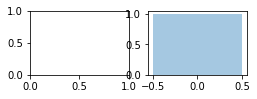

In [35]:
for idx, morpho_tag in enumerate(list(morpho_tag_to_id.keys())):
    if idx % 9 == 0:
        fig = plt.figure(int(idx/9))
    rem = idx % 9
    plt.subplot(3, 3, rem+1)
    print(morpho_tag)
#     sns.violinplot(data=list(loc_group_explanations[morpho_tag].clip(lower=-0.5, upper=0.5)))
    data = loc_group_explanations[morpho_tag].dropna().clip(lower=-0.5, upper=0.5)
    print(data)
    if data.size > 0:
        sns.distplot(data)
plt.show()

In [36]:
loc_group_explanations

,"Clitic=Pa,S",PronType=Dem,Voice=Pass,Derivation=Vs,Clitic=Kin,PronType=Prs,Case=Ess,Person[psor]=2,Reflex=Yes,Number[psor]=Plur,...,Case=Gen,Tense=Pres,Derivation=Ttain,InfForm=3,Derivation=Inen,Mood=Cnd,InfForm=2,Person=3,Case=Abe,Case=Ela
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000118,1.748110e-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000131,1.219641e-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000574,2.664419e-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
mean_loc_group_explanations = loc_group_explanations.mean()

In [38]:
mean_loc_group_explanations.sort_values(ascending=False)

Clitic=Han           0.070752
Case=Ade             0.016556
Case=Ela             0.014458
Case=All             0.011303
PronType=Rel         0.011169
Derivation=Inen      0.008964
Clitic=Kaan          0.007825
AdpType=Post         0.007051
Case=Ill             0.005345
Case=Ine             0.005005
Polarity=Neg         0.004931
Degree=Sup           0.004309
Case=Gen             0.003861
Derivation=Sti       0.003745
Mood=Cnd             0.002786
Person[psor]=3       0.002571
Foreign=Yes          0.002454
PartForm=Pres        0.002406
Person=2             0.001901
Case=Par             0.001812
Derivation=Lainen    0.001314
Mood=Imp             0.001279
Case=Abl             0.001266
Tense=Past           0.001249
Case=Ess             0.001145
Person=3             0.000963
AdpType=Prep         0.000847
Number[psor]=Sing    0.000695
Case=Ins             0.000547
Person=0             0.000526
                       ...   
VerbForm=Inf        -0.000349
Voice=Pass          -0.000572
Typo=Yes  

In [39]:
loc_group_explanations['Loc'].sort_values()[:10]

KeyError: 'Loc'

In [ ]:
loc_group_explanations['Loc'].sort_values(ascending=False)[:10]

In [ ]:
loc_group_explanations.hist(['Loc'], range=[-1, 1], bins=100)

In [ ]:
loc_group_explanations.hist(['Loc'], range=[-0.015, 0.015], bins=100)

In [ ]:
loc_group_explanations['Loc'].value_counts().sort_values(ascending=False)

In [ ]:
[(loc_group_explanations['Loc'][loc_group_explanations['Loc'] < 0]).mean(),
  (loc_group_explanations['Loc'][loc_group_explanations['Loc'] >= 0]).mean()]

In [ ]:
loc_group_explanations.hist(['Loc^DB'], range=[-1, 1])

In [ ]:
loc_group_explanations.hist(['Loc'])

In [ ]:
loc_group_explanations.hist(['Loc^DB'])

In [ ]:
loc_group_explanations.hist(['Loc'], range=[-5000, -10], bins=100)

In [ ]:
loc_group_explanations.hist(['Loc'], range=[1, 1000], bins=100)

In [ ]:
loc_group_explanations['Loc'][loc_group_explanations['Loc'] < 0].count()

In [ ]:
loc_group_explanations['Loc'][loc_group_explanations['Loc'] >= 0].count()

In [ ]:
for morpho_tag in ['Loc', 'Loc^DB']:
    below_zero = loc_group_explanations[morpho_tag][loc_group_explanations[morpho_tag] < 0].count()
    above_zero = loc_group_explanations[morpho_tag][loc_group_explanations[morpho_tag] >= 0].count()
    print(morpho_tag, below_zero, above_zero)

# ORG type entities - analysis

In [ ]:
org_group_explanations = explanations[explanations['entity_type'] == "ORG"].drop(["sentence_idx", "entity_type", "entity_start", "entity_end"], axis=1)

In [ ]:
org_group_explanations.mean().sort_values(ascending=False)

# PER type entities - analysis

In [ ]:
per_group_explanations = explanations[explanations['entity_type'] == "PER"].drop(["sentence_idx", "entity_type", "entity_start", "entity_end"], axis=1)

In [ ]:
per_group_explanations.mean().sort_values(ascending=False)

In [ ]:
!pwd

In [ ]:
!ls ../../explanations-for-ner-train-finnish-201901*

In [ ]:
tmp = list(range(10))
tmp
np.reshape(tmp, (2, 5))

# Probabilities Analysis

In [40]:
lines = []
raw_data_records = []
with open(files["finnish_model_100_size"]["raw_data"], "r") as f:
    lines = f.readlines()
    for line in lines:
        first_part, second_part, third_part, fourth_part = line.strip().split("\t")
        
        size_x, size_y, *conf_data = [int(float(x)) for x in first_part.split(" ")]
        C = np.reshape(conf_data, (size_x, size_y))
        
        size_x, size_y, *probs_data = [float(x) for x in second_part.split(" ")]
        P = np.reshape(probs_data, (int(size_x), int(size_y)))
        
        target_class_index = int(third_part)
        
        n_morpho_tags, *morpho_tag_ids = [int(x) for x in fourth_part.split(" ")]
        
        record = (C, P, target_class_index, n_morpho_tags, morpho_tag_ids)
        raw_data_records.append(record)

In [41]:
raw_data_records[0]

(array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]]),
 array([[1.200689e-11, 6.518856e-06, 8.460681e-04, 9.756015e-03,
         2.195355e-03, 9.536087e-01, 1.152887e-04, 3.183193e-02,
         1.392935e-03, 2.039280e-04, 4.318751e-05],
        [1.223159e-11, 6.749194e-06, 7.403019e-04, 9.329143e-03,
         1.841719e-03, 9.635675e-01, 1.097282e-04, 2.291203e-02,
         1.172700e-03, 2.978830e-04, 2.227280e-05],
        [5.307357e-12, 7.257433e-06, 7.807105e-04, 2.328885e-03,
         2.234354e-03, 9.758613e-01, 7.840233e-05, 1.

In [42]:
raw_data_records[0][1].sum(axis=1)

array([0.99999993, 1.00000003, 1.00000006, 0.99999993, 0.99999993,
       0.99999993, 0.99999993, 0.99999993, 0.99999993, 0.99999993,
       0.99999993, 0.99999993])

# single C and P

In [43]:
C = raw_data_records[0][0]
P = raw_data_records[0][1]
target_class_index = raw_data_records[0][2]
n_morpho_tags = raw_data_records[0][3]
morpho_tag_ids_per_sentence = raw_data_records[0][4]

In [44]:
P[:, target_class_index]

array([0.9536087, 0.9635675, 0.9758613, 0.9536087, 0.9536087, 0.9536087,
       0.9536087, 0.9536087, 0.9536087, 0.9536087, 0.9536087, 0.9536087])

In [45]:
C

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])

In [46]:
morpho_tag_ids_per_sentence

[0, 1, 2, 3, 5, 9, 10, 11, 19, 26, 88]

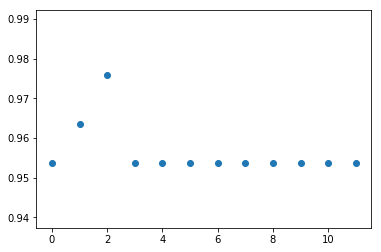

In [47]:
plt.scatter(x=range(0, 12), y=P[:, target_class_index])

In [48]:
records[0]

[2,
 'ORG',
 (7, 8),
 {'Case=Nom': -0.009883502524801774,
  'Number=Sing': -0.0037390832717981723,
  '*UNKNOWN*': 0.0012383267944358308,
  'Tense=Pres': 0.0012383267944358304,
  'Voice=Act': 0.0012383267944358302,
  'Person=3': 0.0012383267944358302,
  'Case=Par': 0.0012383267944358302,
  'VerbForm=Inf': 0.0012383267944358302,
  'InfForm=1': 0.0012383267944358302,
  'Mood=Ind': 0.00123832679443583,
  'VerbForm=Fin': 0.0012383267944358295}]

# all over the file

In [139]:
from collections import defaultdict
zero_centered_Ps = defaultdict(list)
indexed_Cs = defaultdict(list)
for i in range(len(raw_data_records)):
    C = raw_data_records[i][0]
    P = raw_data_records[i][1]
    target_class_index = raw_data_records[i][2]
    n_morpho_tags = raw_data_records[i][3]
    morpho_tag_ids_per_sentence = raw_data_records[i][4]
    target_entity_type = records[i][1]

    unperturbated_configuration = [0]*n_morpho_tags
    for morpho_tag_id in morpho_tag_ids_per_sentence:
        unperturbated_configuration[morpho_tag_id] = 1
#     indexed_C = [0]*n_morpho_tags
#     for idx in range(len(indexed_C)):
#         indexed_C[idx] = list(unperturbated_configuration)
    
    # indexed_C = [list(unperturbated_configuration)]
    indexed_C = []
    for idx in range(n_morpho_tags):
        tainted = False
        perturbated_configuration = list(unperturbated_configuration)
        for morpho_tag_idx, morpho_tag_id in enumerate(morpho_tag_ids_per_sentence):
            if idx == morpho_tag_id and unperturbated_configuration[morpho_tag_id] == 1:
                perturbated_configuration[morpho_tag_id] = -1
                tainted = True
        if True:
            indexed_C.append(perturbated_configuration)
    indexed_Cs[target_entity_type] += [np.array(indexed_C)]
    
    zero_centered_P = [0.0]*n_morpho_tags
    for morpho_tag_id, diff_value in zip(morpho_tag_ids_per_sentence, 
                                         list(P[1:, target_class_index]-P[0,target_class_index])):
        zero_centered_P[morpho_tag_id] = diff_value
    zero_centered_Ps[target_entity_type] += zero_centered_P
    
for target_entity_type in zero_centered_Ps.keys():
    zero_centered_Ps[target_entity_type] = np.reshape(zero_centered_Ps[target_entity_type], (-1, n_morpho_tags))
    indexed_Cs[target_entity_type] = np.array(indexed_Cs[target_entity_type])

In [139]:
# Eski versiyonun duzeltilmis hali
from collections import defaultdict
zero_centered_Ps = defaultdict(list)
indexed_Cs = defaultdict(list)
for i in range(len(raw_data_records)):
    C = raw_data_records[i][0]
    P = raw_data_records[i][1]
    target_class_index = raw_data_records[i][2]
    n_morpho_tags = raw_data_records[i][3]
    morpho_tag_ids_per_sentence = raw_data_records[i][4]
    target_entity_type = records[i][1]

    unperturbated_configuration = [0]*n_morpho_tags
    for morpho_tag_id in morpho_tag_ids_per_sentence:
        unperturbated_configuration[morpho_tag_id] = 1
#     indexed_C = [0]*n_morpho_tags
#     for idx in range(len(indexed_C)):
#         indexed_C[idx] = list(unperturbated_configuration)
    
    # indexed_C = [list(unperturbated_configuration)]
    indexed_C = []
    for idx in range(n_morpho_tags):
        tainted = False
        perturbated_configuration = list(unperturbated_configuration)
        for morpho_tag_idx, morpho_tag_id in enumerate(morpho_tag_ids_per_sentence):
            if idx == morpho_tag_id and unperturbated_configuration[morpho_tag_id] == 1:
                perturbated_configuration[morpho_tag_id] = -1
                tainted = True
        if True:
            indexed_C.append(perturbated_configuration)
    indexed_Cs[target_entity_type] += [np.array(indexed_C)]
    
    zero_centered_P = [0.0]*n_morpho_tags
    for morpho_tag_id, diff_value in zip(morpho_tag_ids_per_sentence, 
                                         list(P[1:, target_class_index]-P[0,target_class_index])):
        zero_centered_P[morpho_tag_id] = diff_value
    zero_centered_Ps[target_entity_type] += zero_centered_P
    
for target_entity_type in zero_centered_Ps.keys():
    zero_centered_Ps[target_entity_type] = np.reshape(zero_centered_Ps[target_entity_type], (-1, n_morpho_tags))
    indexed_Cs[target_entity_type] = np.array(indexed_Cs[target_entity_type])

In [213]:
# version without duplicates
from collections import defaultdict
zero_centered_Ps = defaultdict(list)
indexed_Cs = defaultdict(list)
for i in range(len(raw_data_records)):
    C = raw_data_records[i][0]
    P = raw_data_records[i][1]
    target_class_index = raw_data_records[i][2]
    n_morpho_tags = raw_data_records[i][3]
    morpho_tag_ids_per_sentence = raw_data_records[i][4]
    target_entity_type = records[i][1]

    unperturbated_configuration = [0]*n_morpho_tags
    for morpho_tag_id in morpho_tag_ids_per_sentence:
        unperturbated_configuration[morpho_tag_id] = 1
#     indexed_C = [0]*n_morpho_tags
#     for idx in range(len(indexed_C)):
#         indexed_C[idx] = list(unperturbated_configuration)
    
    indexed_C = [list(unperturbated_configuration)]
    for idx in range(n_morpho_tags):
        tainted = False
        perturbated_configuration = list(unperturbated_configuration)
        for morpho_tag_idx, morpho_tag_id in enumerate(morpho_tag_ids_per_sentence):
            if idx == morpho_tag_id and unperturbated_configuration[morpho_tag_id] == 1:
                perturbated_configuration[morpho_tag_id] = -1
                tainted = True
        if tainted:
            indexed_C.append(perturbated_configuration)
    indexed_Cs[target_entity_type] += [np.array(indexed_C)]
    
    zero_centered_P = [0.0]
    for morpho_tag_id, diff_value in zip(morpho_tag_ids_per_sentence, 
                                         list(P[1:, target_class_index]-P[0,target_class_index])):
        zero_centered_P.append(diff_value)
    zero_centered_Ps[target_entity_type] += [zero_centered_P]
    
for target_entity_type in zero_centered_Ps.keys():
    zero_centered_Ps[target_entity_type] = np.array(zero_centered_Ps[target_entity_type])
    indexed_Cs[target_entity_type] = np.array(indexed_Cs[target_entity_type])

In [72]:
with open(files["finnish_model_100_size"]["id_to_morpho_tag"], "r") as id_to_morpho_tag_f:
    id_to_morpho_tag = {int(x.split(" ")[0]): x.split(" ")[1] for x in id_to_morpho_tag_f.readline().strip().split("\t")}

In [374]:
zero_centered_Ps.keys()

dict_keys(['ORG', 'TIT', 'PER', 'TIM', 'LOC', 'DATE', 'PRO', 'MISC', 'EVENT', 'OUTSIDE'])

In [73]:
id_to_morpho_tag

{0: 'Number=Sing',
 1: 'Case=Nom',
 2: 'Voice=Act',
 3: 'VerbForm=Fin',
 4: '*BLANK*',
 5: 'Mood=Ind',
 6: 'Number=Plur',
 7: 'Case=Gen',
 8: 'Degree=Pos',
 9: 'Person=3',
 10: 'Tense=Pres',
 11: 'Case=Par',
 12: 'Tense=Past',
 13: 'Style=Coll',
 14: 'VerbForm=Part',
 15: 'Case=Ine',
 16: 'Case=Ill',
 17: 'PartForm=Past',
 18: 'Case=Ela',
 19: 'VerbForm=Inf',
 20: 'Voice=Pass',
 21: 'Person=1',
 22: 'Case=Ade',
 23: 'Person=0',
 24: 'Connegative=Yes',
 25: 'Polarity=Neg',
 26: 'InfForm=1',
 27: 'Person[psor]=3',
 28: 'PronType=Dem',
 29: 'Person=2',
 30: 'Case=All',
 31: 'AdpType=Post',
 32: 'PartForm=Pres',
 33: 'Derivation=Minen',
 34: 'NumType=Card',
 35: 'Case=Ess',
 36: 'Case=Tra',
 37: 'Typo=Yes',
 38: 'Mood=Cnd',
 39: 'PronType=Ind',
 40: 'Mood=Imp',
 41: 'Abbr=Yes',
 42: 'PronType=Prs',
 43: 'InfForm=3',
 44: 'Foreign=Yes',
 45: 'Clitic=Kin',
 46: 'Case=Ins',
 47: 'PartForm=Agt',
 48: 'Case=Abl',
 49: 'Person[psor]=1',
 50: 'InfForm=2',
 51: 'PronType=Rel',
 52: 'Number[psor]=S

In [214]:
zero_centered_Ps['ORG'][0]

[0.0,
 0.009958800000000045,
 0.022252600000000067,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

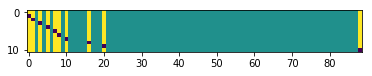

In [215]:
plt.imshow(indexed_Cs['ORG'][2])

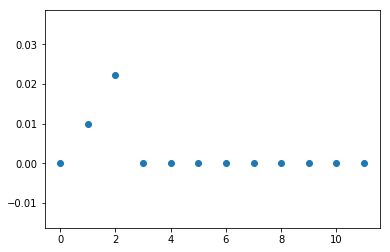

In [216]:
plt.scatter(x=range(len(zero_centered_Ps['ORG'][0])), y=zero_centered_Ps['ORG'][0])

In [217]:
indexed_Cs['ORG'][1].shape

(7, 89)

In [218]:
len(indexed_Cs['ORG'])

9101

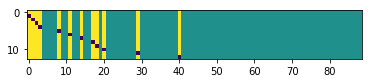

In [219]:
plt.imshow(indexed_Cs['ORG'][3])

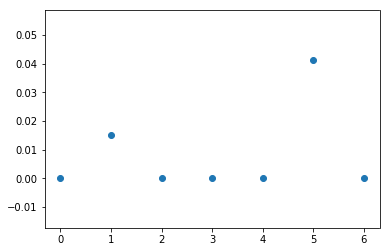

In [221]:
plt.scatter(x=range(len(zero_centered_Ps['ORG'][1])), y=zero_centered_Ps['ORG'][1])

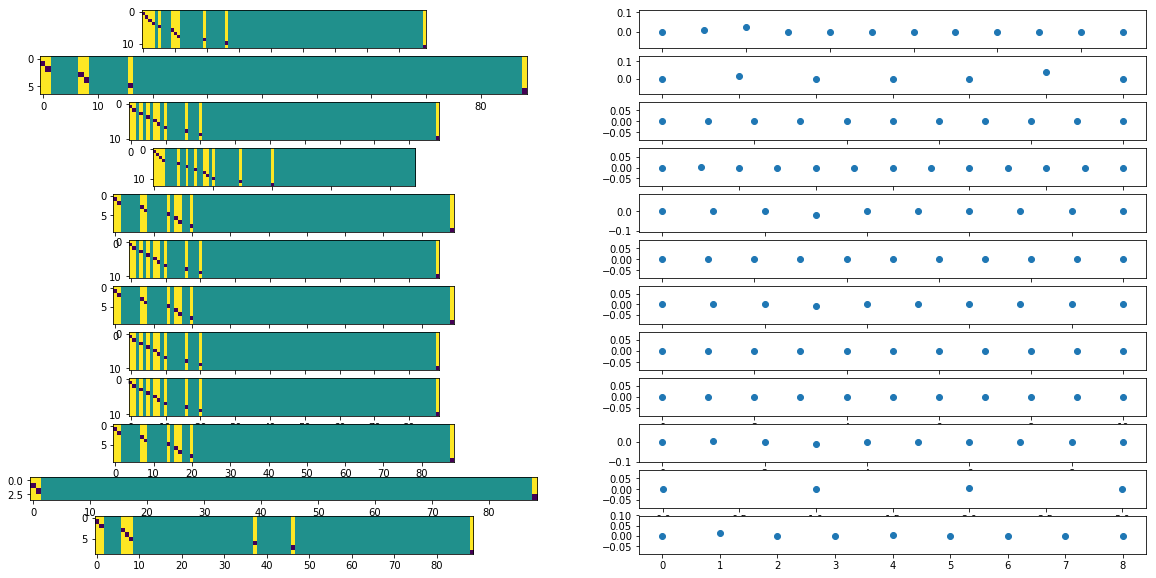

In [222]:
plt.figure(figsize=(20, 10))
# how_many_to_plot = len(indexed_Cs['ORG'])
how_many_to_plot = 12
for sample_idx in range(how_many_to_plot):
    plt.subplot(how_many_to_plot, 2, sample_idx*2+1)
    plt.imshow(indexed_Cs['ORG'][sample_idx])
    plt.subplot(how_many_to_plot, 2, sample_idx*2+2)
    plt.scatter(x=range(len(zero_centered_Ps['ORG'][sample_idx])), y=zero_centered_Ps['ORG'][sample_idx])

In [223]:
zero_centered_Ps['ORG'].shape

(9101,)

In [224]:
indexed_Cs['ORG'].shape

(9101,)

# ORG

In [225]:
X = dict()

In [256]:
indexed_Cs['ORG']

array([array([[ 1,  1,  1, ...,  0,  0,  1],
       [-1,  1,  1, ...,  0,  0,  1],
       [ 1, -1,  1, ...,  0,  0,  1],
       ...,
       [ 1,  1,  1, ...,  0,  0,  1],
       [ 1,  1,  1, ...,  0,  0,  1],
       [ 1,  1,  1, ...,  0,  0, -1]]),
       array([[ 1,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1],
       [-1,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

In [227]:
sum([el.shape[0] for el in indexed_Cs['ORG']])

74771

In [193]:
np.concatenate(indexed_Cs['ORG'], axis=0).shape

(74771, 89)

In [187]:
### not remove duplicates X['ORG'] = np.reshape(indexed_Cs['ORG'], (-1, 89))

ValueError: cannot reshape array of size 9101 into shape (89)

In [228]:
X['ORG'] = np.concatenate(indexed_Cs['ORG'], axis=0)

In [229]:
X['ORG'].shape

(74771, 89)

In [230]:
Y = dict()
### not remove duplicates Y['ORG'] = np.reshape(zero_centered_Ps['ORG'], (-1,))
Y['ORG'] = np.concatenate(zero_centered_Ps['ORG'], axis=0)

In [231]:
Y['ORG'].shape

(74771,)

In [232]:
np.concatenate(zero_centered_Ps['ORG'], axis=0)

array([0.       , 0.0099588, 0.0222526, ..., 0.       , 0.       ,
       0.       ])

In [233]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.5, fit_intercept=False)

In [234]:
reg.fit(X['ORG'], Y['ORG'])

Ridge(alpha=0.5, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [235]:
reg.intercept_

0.0

In [236]:
sorted([(id_to_morpho_tag[idx], value) for idx, value in zip(sorted(id_to_morpho_tag.keys()), reg.coef_)],
       key=lambda x: x[1],
       reverse=True)

[('PronType=Rel', 0.026186003208162643),
 ('Person[psor]=3', 0.00344042636002547),
 ('Derivation=Vs', 0.002669329824485317),
 ('Derivation=Ja', 0.002648589472616649),
 ('Clitic=Kin', 0.0020328584439712593),
 ('AdpType=Prep', 0.0015888679302410447),
 ('PartForm=Agt', 0.0015814193469522687),
 ('Case=Ess', 0.0015190721383648313),
 ('Number[psor]=Plur', 0.0012384263889267486),
 ('Person[psor]=1', 0.0011993491039908283),
 ('Derivation=Minen', 0.0010790265095129668),
 ('Foreign=Yes', 0.00100384236321926),
 ('*UNKNOWN*', 0.0009564505804024868),
 ('Degree=Pos', 0.0009305903448258418),
 ('Mood=Imp', 0.0008523493840123075),
 ('InfForm=1', 0.0008248386092351917),
 ('Clitic=S', 0.0007325617065196654),
 ('Derivation=Ton', 0.00068328430930242),
 ('Person=0', 0.0006783672596778055),
 ('AdpType=Post', 0.0005024552472867764),
 ('Typo=Yes', 0.0004660200738495324),
 ('Degree=Sup', 0.00044606754762963654),
 ('Case=Gen', 0.00043986989140575424),
 ('Case=All', 0.0004175267818558788),
 ('Voice=Act', 0.000311

<BarContainer object of 89 artists>

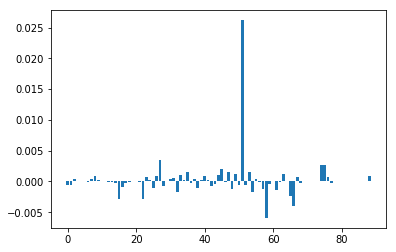

In [237]:
plt.bar(x=range(len(reg.coef_)), height=reg.coef_)

In [239]:


### X['LOC'] = np.reshape(indexed_Cs['LOC'], (-1, 89))
X['LOC'] = np.concatenate(indexed_Cs['LOC'], axis=0)

X['LOC'].shape

Y['LOC'] = np.concatenate(zero_centered_Ps['LOC'], axis=0)

Y['LOC'].shape

from sklearn.linear_model import Ridge
reg_loc = Ridge(alpha=1, fit_intercept=False)

reg_loc.fit(X['LOC'], Y['LOC'])

print(reg_loc.intercept_)

sorted([(id_to_morpho_tag[idx], value) for idx, value in zip(sorted(id_to_morpho_tag.keys()), reg_loc.coef_)],
       key=lambda x: x[1],
       reverse=True)

0.0


[('PronType=Rel', 0.025215034908740375),
 ('Derivation=Inen', 0.018171333630334824),
 ('Clitic=Han', 0.017212754330799968),
 ('Clitic=Kaan', 0.014639557679573036),
 ('Person[psor]=1', 0.013569132754961194),
 ('Case=Ade', 0.009473273572061581),
 ('Case=All', 0.009120622399616312),
 ('Polarity=Neg', 0.008031811294379356),
 ('Case=Ela', 0.007911646756783363),
 ('Derivation=Sti', 0.006651286177827635),
 ('Foreign=Yes', 0.005401693165527355),
 ('PartForm=Pres', 0.004573833867556618),
 ('Case=Ess', 0.004026070720353241),
 ('Case=Ine', 0.0039034472637266083),
 ('Number[psor]=Sing', 0.0038224042649628643),
 ('Mood=Cnd', 0.003469309673585347),
 ('Case=Gen', 0.0032749600037183316),
 ('Person=3', 0.003252313369528754),
 ('Person=2', 0.002978277330282103),
 ('Case=Ill', 0.0029188414543161595),
 ('Derivation=Lainen', 0.0029132256799138845),
 ('Derivation=Ja', 0.0024187171634191757),
 ('Number[psor]=Plur', 0.0023218952476152894),
 ('Connegative=Yes', 0.002136688033817805),
 ('Tense=Past', 0.00191023

In [240]:
explanations = dict()

In [375]:


for entity_type in zero_centered_Ps.keys():
    explanations[entity_type] = []
    for sentence_idx in range(indexed_Cs[entity_type].shape[0]):

        from sklearn.linear_model import Ridge
        reg_loc = Ridge(alpha=1, fit_intercept=False)

        cur_X = indexed_Cs[entity_type][sentence_idx] # (89, 89)
        cur_Y = zero_centered_Ps[entity_type][sentence_idx] # (89,)
        reg_loc.fit(cur_X, cur_Y)

        # print("sentence: %d, intercept: %lf", sentence_idx, reg_loc.intercept_)

        cur_explanation = sorted([(idx, id_to_morpho_tag[idx], value) for idx, value in zip(sorted(id_to_morpho_tag.keys()), reg_loc.coef_)],
               key=lambda x: x[2],
               reverse=True)
        cur_str_explanation = "\n".join([" ".join((str(idx), morpho_tag, "%.7lf" % weight)) for idx, morpho_tag, weight in cur_explanation])
    #     print(cur_explanation)
        explanations[entity_type].append(cur_explanation)

In [242]:
from IPython.display import display_html

In [313]:
def prepare_html(cur_explanation, limit=None):
    if limit:
        arr = (cur_explanation[:limit] + [(-1, "===SEP===", -10000)] + cur_explanation[-limit:])
    else:
        arr = cur_explanation    
    ret = "<p>"
    ret += "<br/>\n".join([" ".join(("%05s %020s" % (str(idx), morpho_tag), "%.7lf" % weight)) for idx, morpho_tag, weight in arr])
    ret += "</p>"
    return ret

In [314]:
display_html(prepare_html(explanations['LOC'][6], 10), raw=True)

15 Case=Ine 0.0004138 
 2 Voice=Act 0.0000000 
 3 VerbForm=Fin 0.0000000 
 4 *BLANK* 0.0000000 
 5 Mood=Ind 0.0000000 
 6 Number=Plur 0.0000000 
 7 Case=Gen 0.0000000 
 9 Person=3 0.0000000 
 10 Tense=Pres 0.0000000 
 11 Case=Par 0.0000000 
 -1 ===SEP=== -10000.0000000 
 82 Style=Arch 0.0000000 
 83 PartForm=Neg 0.0000000 
 84 Derivation=U 0.0000000 
 85 Clitic=Han,Pa 0.0000000 
 86 Derivation=Llinen 0.0000000 
 87 Derivation=Tar 0.0000000 
 88 *UNKNOWN* -0.0001718 
 1 Case=Nom -0.0001718 
 8 Degree=Pos -0.0001718 
 0 Number=Sing -0.0001847

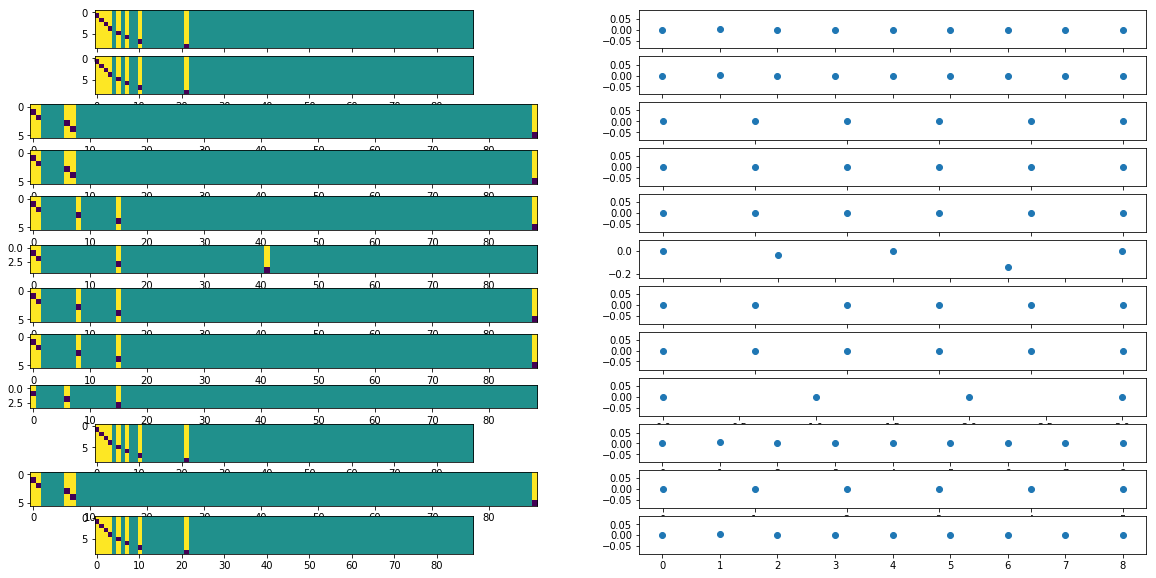

In [258]:
plt.figure(figsize=(20, 10))
# how_many_to_plot = len(indexed_Cs['ORG'])
how_many_to_plot = 12
for sample_idx in range(how_many_to_plot):
    plt.subplot(how_many_to_plot, 2, sample_idx*2+1)
    plt.imshow(indexed_Cs['LOC'][sample_idx])
    plt.subplot(how_many_to_plot, 2, sample_idx*2+2)
    plt.scatter(x=range(len(zero_centered_Ps['LOC'][sample_idx])), y=zero_centered_Ps['LOC'][sample_idx])

In [349]:
explanations['LOC'][2][:20]

[(6, 'Number=Plur', 0.00025551599999999123),
 (2, 'Voice=Act', 0.0),
 (3, 'VerbForm=Fin', 0.0),
 (4, '*BLANK*', 0.0),
 (5, 'Mood=Ind', 0.0),
 (8, 'Degree=Pos', 0.0),
 (9, 'Person=3', 0.0),
 (10, 'Tense=Pres', 0.0),
 (11, 'Case=Par', 0.0),
 (12, 'Tense=Past', 0.0),
 (13, 'Style=Coll', 0.0),
 (14, 'VerbForm=Part', 0.0),
 (15, 'Case=Ine', 0.0),
 (16, 'Case=Ill', 0.0),
 (17, 'PartForm=Past', 0.0),
 (18, 'Case=Ela', 0.0),
 (19, 'VerbForm=Inf', 0.0),
 (20, 'Voice=Pass', 0.0),
 (21, 'Person=1', 0.0),
 (22, 'Case=Ade', 0.0)]

In [396]:
# explanations_nparray = np.array([[t[1] for t in sorted(explanations['LOC'][i], key=lambda x: x[0])] for i in range(len(explanations['LOC']))])
#explanations_nparray = np.array(explanations['LOC'])
explanations_nparray_dict = {}
for entity_type in zero_centered_Ps.keys():
    explanations_nparray_dict[entity_type] = np.array([[t[2] for t in sorted(explanations[entity_type][i], key=lambda x: x[0])] for i in range(len(explanations[entity_type]))])


In [397]:
explanations_nparray_dict['TIM']

array([[-0.00069124,  0.00041888,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00036707,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00645165, -0.00645165, -0.00645165, ...,  0.        ,
         0.        ,  0.06953447],
       ...,
       [-0.00097279, -0.00099911,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00483254, -0.00483254, -0.00483254, ...,  0.        ,
         0.        ,  0.00182218],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.00084994]])

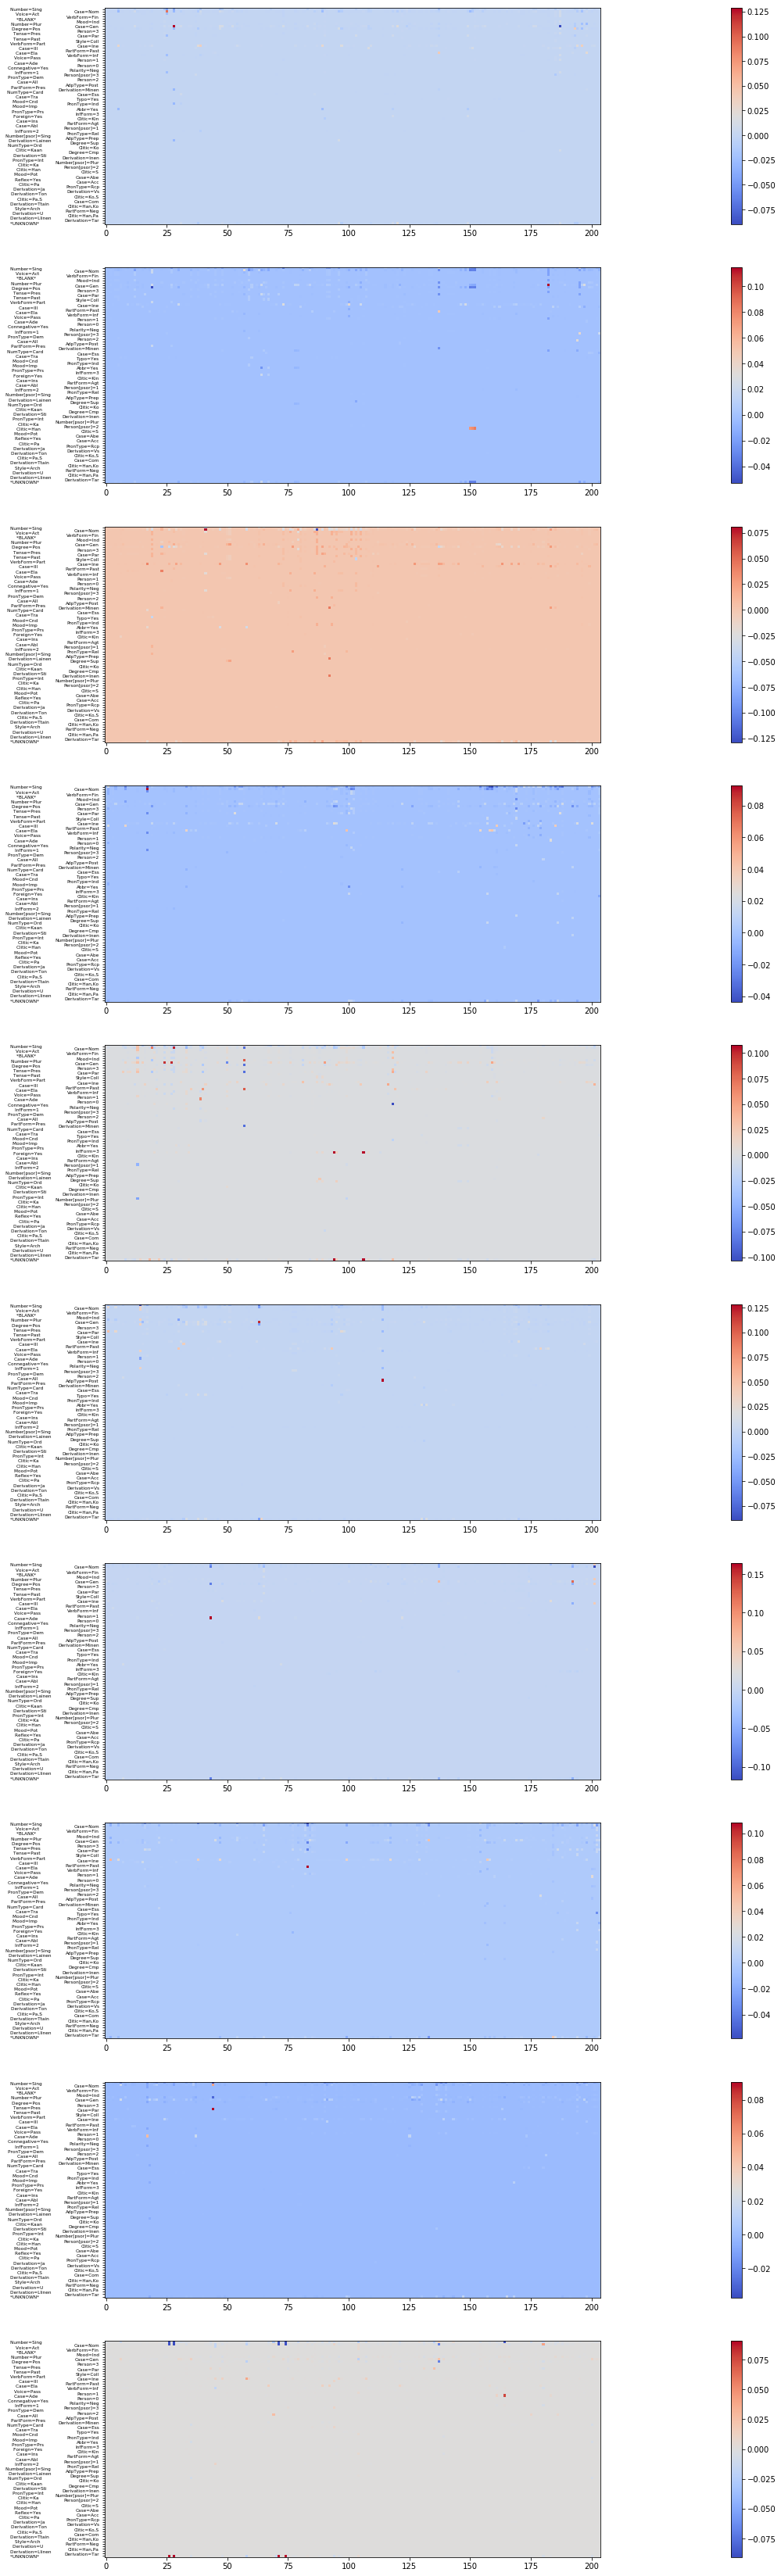

In [398]:
# import matplotlib
# @matplotlib.ticker.FuncFormatter
# def formatoddticks(x, pos):
#     """Format odd tick positions
#     """
#     if pos % 2:
#         return 'XXX'
#     else:
#         return 'YYY'
    
# formatter = matplotlib.ticker.FuncFormatter(formatoddticks)

plt.figure(figsize=(60, 60))

len_explanations_nparray = explanations_nparray_dict['LOC'].shape[0]
n_batches = 10
batch_size = len_explanations_nparray//n_batches
for i in range(1, n_batches+1):
    axes = plt.subplot(n_batches, 1, i)
    # axes.yaxis.set_major_formatter(formatoddticks)
    plt.imshow(explanations_nparray_dict['LOC'][(i-1)*batch_size:(i)*batch_size, :].T, 
               interpolation='none',
              cmap="coolwarm")
    tick_labels = [m[1] for m in sorted(id_to_morpho_tag.items(), key=lambda x: x[0])]
    tick_labels = [("%-50s" % label if idx % 2 == 0 else label) for idx, label in enumerate(tick_labels)]
    plt.yticks(ticks=range(len(id_to_morpho_tag)), 
               labels=tick_labels, 
               rotation=0, 
               fontsize="xx-small")
    plt.colorbar()

In [400]:
zero_centered_Ps['ORG'][0]

[0.0,
 0.009958800000000045,
 0.022252600000000067,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [401]:
[(id_to_morpho_tag[idx], el) for idx, el in enumerate(explanations_nparray_dict['LOC'].mean(axis=0))]

[('Number=Sing', -0.0027932051055397254),
 ('Case=Nom', -0.0016066222839629162),
 ('Voice=Act', 8.978228146275703e-05),
 ('VerbForm=Fin', 0.00011992834240680875),
 ('*BLANK*', 0.0),
 ('Mood=Ind', 7.356898432805554e-05),
 ('Number=Plur', 1.9146015382767125e-05),
 ('Case=Gen', 0.0012378318053104602),
 ('Degree=Pos', -0.000686120788843744),
 ('Person=3', 5.539422266469686e-05),
 ('Tense=Pres', 6.275836777954622e-05),
 ('Case=Par', 0.0001663492755325193),
 ('Tense=Past', 7.532000629007129e-05),
 ('Style=Coll', 1.656828416729073e-05),
 ('VerbForm=Part', 3.367464982966565e-06),
 ('Case=Ine', 0.0010430033080148992),
 ('Case=Ill', 0.00032865649969888674),
 ('PartForm=Past', -9.753546658834949e-06),
 ('Case=Ela', 0.0005201598186392846),
 ('VerbForm=Inf', -5.160363312871281e-05),
 ('Voice=Pass', -3.465935555171241e-05),
 ('Person=1', 4.292488044925968e-05),
 ('Case=Ade', 0.0002423884546319551),
 ('Person=0', 2.5412689085544326e-06),
 ('Connegative=Yes', -2.787547597244115e-05),
 ('Polarity=Neg',

In [402]:
sorted([(id_to_morpho_tag[idx], el) for idx, el in enumerate(explanations_nparray_dict['LOC'].mean(axis=0))], key=lambda x: x[1], reverse=True)

[('Case=Gen', 0.0012378318053104602),
 ('Case=Ine', 0.0010430033080148992),
 ('Case=Ela', 0.0005201598186392846),
 ('Case=Ill', 0.00032865649969888674),
 ('Case=Ade', 0.0002423884546319551),
 ('Foreign=Yes', 0.00016683296381615384),
 ('Case=Par', 0.0001663492755325193),
 ('VerbForm=Fin', 0.00011992834240680875),
 ('Clitic=Han', 0.00011714033468029114),
 ('Voice=Act', 8.978228146275703e-05),
 ('Case=All', 7.619907059368192e-05),
 ('Tense=Past', 7.532000629007129e-05),
 ('Mood=Ind', 7.356898432805554e-05),
 ('Tense=Pres', 6.275836777954622e-05),
 ('Person=3', 5.539422266469686e-05),
 ('AdpType=Post', 5.098503632462017e-05),
 ('Person=1', 4.292488044925968e-05),
 ('Case=Ess', 3.6075304827432694e-05),
 ('Person[psor]=3', 3.459894355732983e-05),
 ('*UNKNOWN*', 2.827617315388867e-05),
 ('Derivation=Inen', 2.6912169888106247e-05),
 ('Degree=Sup', 2.0619584641622905e-05),
 ('Derivation=Lainen', 2.029767468684527e-05),
 ('Number=Plur', 1.9146015382767125e-05),
 ('Person=2', 1.905329996919123e-0

In [403]:
for entity_type in zero_centered_Ps.keys():
    mean_for_entity_type = sorted([(id_to_morpho_tag[idx], el) for idx, el in enumerate(explanations_nparray_dict[entity_type].mean(axis=0))], 
                                  key=lambda x: x[1], reverse=True)
    limited_mean_for_entity_type = mean_for_entity_type[:10] + mean_for_entity_type[-10:]
    df_results = pd.DataFrame([x for x in limited_mean_for_entity_type], 
                              index=[x[0] for x in limited_mean_for_entity_type])
    print("\\begin{table}")
    print(df_results.to_latex(header=["Morphological Tag", "Average Weight"], index=False))
    print("\\caption{Average weights over the corpus for %s entities\label{tab:%s_corpus_average}}" % (entity_type, entity_type.lower()))
    print("\\end{table}")
    print("")


\begin{table}
\begin{tabular}{lr}
\toprule
 Morphological Tag & Average Weight \\
\midrule
         *UNKNOWN* &       0.000606 \\
          Case=Gen &       0.000281 \\
        Degree=Pos &       0.000260 \\
       Foreign=Yes &       0.000251 \\
         Voice=Act &       0.000156 \\
          Abbr=Yes &       0.000124 \\
          Mood=Ind &       0.000117 \\
      VerbForm=Fin &       0.000108 \\
        Style=Coll &       0.000090 \\
          Person=3 &       0.000088 \\
          Case=Par &      -0.000003 \\
 Derivation=Lainen &      -0.000003 \\
          Case=Abl &      -0.000017 \\
          Mood=Cnd &      -0.000018 \\
          Case=Ela &      -0.000022 \\
          Case=Ill &      -0.000051 \\
          Case=Ine &      -0.000055 \\
          Case=Ade &      -0.000101 \\
          Case=Nom &      -0.000583 \\
       Number=Sing &      -0.000619 \\
\bottomrule
\end{tabular}

\caption{Average weights over the corpus for ORG entities\label{tab:org_corpus_average}}
\end{table}



In [404]:
explanations_nparray_dict['LOC'][3]

array([-3.6744e-04, -3.6744e-04,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  4.5904e-04,  3.0880e-05,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.00

In [405]:
np.argsort(explanations_nparray_dict['LOC'], axis=1)[:, ::-1][:, :5]

array([[21,  1,  2,  3,  5],
       [ 7, 21,  1,  2,  3],
       [ 6, 44, 35, 27, 28],
       ...,
       [ 7,  1, 88, 32, 24],
       [ 7,  1, 88, 32, 24],
       [ 7,  1, 88, 32, 24]])

In [413]:
df_results

,0,1,2,3,4
0,0,7,36,28,29
1,1,8,88,22,32
2,1,0,36,28,29
3,7,1,6,88,33
4,1,46,34,26,27


In [427]:
df_results.apply(pd.Series.value_counts)

,0,1,2,3,4
0,612.0,844.0,608.0,210.0,292.0
1,1490.0,1039.0,317.0,139.0,324.0
2,532.0,745.0,494.0,233.0,253.0
3,256.0,433.0,692.0,434.0,214.0
4,NaN,NaN,2.0,6.0,1.0
5,80.0,329.0,407.0,622.0,577.0
6,273.0,552.0,324.0,279.0,149.0
7,481.0,419.0,396.0,95.0,48.0
8,441.0,491.0,378.0,360.0,294.0
9,29.0,58.0,103.0,107.0,121.0


In [446]:
for entity_type in zero_centered_Ps.keys():
    top_k = 1
    top_k_morpho_tags = np.argsort(explanations_nparray_dict[entity_type], axis=1)[:, ::-1][:, :top_k]
    
    top_k_morpho_tags = [[id_to_morpho_tag[idx] for idx in row] for row in top_k_morpho_tags]
    
    
    df_results = pd.DataFrame(top_k_morpho_tags, 
                              columns=[str(x)+"th" for x in range(1, top_k+1)])
    print(entity_type)
    display(df_results.apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)[:20])

ORG


*UNKNOWN*       2823
Case=Nom        1490
Number=Sing      612
Voice=Act        532
Case=Gen         481
Foreign=Yes      455
Degree=Pos       441
Tense=Past       393
Number=Plur      273
VerbForm=Fin     256
Abbr=Yes         160
NumType=Ord      131
Case=All          93
Style=Coll        87
Case=Ins          80
Mood=Ind          80
Case=Par          68
VerbForm=Inf      66
InfForm=1         66
Person=1          56
dtype: int64

TIT


Number=Sing         509
Case=Nom             72
Case=Gen             16
*UNKNOWN*            11
Derivation=Minen      7
Voice=Act             3
Degree=Pos            3
Number=Plur           2
Derivation=Vs         1
Typo=Yes              1
VerbForm=Part         1
Foreign=Yes           1
Tense=Past            1
Person=3              1
Mood=Pot              1
Case=Ela              1
dtype: int64

PER


Number=Sing         760
Case=Nom            415
*UNKNOWN*           305
Case=Gen            175
Voice=Act            91
Foreign=Yes          84
Style=Coll           67
VerbForm=Fin         54
Abbr=Yes             37
Degree=Pos           35
Case=Par             24
Number=Plur          23
Tense=Past           13
Derivation=Minen     12
Clitic=Kin           11
Tense=Pres           10
Mood=Ind              8
Typo=Yes              8
AdpType=Post          7
Person=3              7
dtype: int64

TIM


*UNKNOWN*       1465
Degree=Pos       969
Number=Sing      901
Case=Ess         328
Case=Nom         209
Case=Gen         204
Case=Ine         184
Number=Plur       81
Typo=Yes          73
Style=Coll        71
Case=Ade          65
Voice=Act         65
Case=Par          59
InfForm=2         34
Mood=Imp          32
Case=Ela          31
NumType=Card      30
Clitic=Kin        27
Case=Ill          25
Tense=Past        24
dtype: int64

LOC


Case=Ine          573
Case=Gen          519
Number=Plur       229
*UNKNOWN*         112
Case=Ela           96
Number=Sing        89
Case=Par           81
Case=Ill           79
Case=Nom           43
Case=Ade           39
Person=1           38
Voice=Act          26
Degree=Pos         22
Case=All           17
Voice=Pass         12
Foreign=Yes        11
Person[psor]=3      7
Mood=Ind            5
Case=Ess            5
Tense=Pres          4
dtype: int64

DATE


Number=Sing      196
Case=Ess         153
Degree=Pos       141
Case=Gen         112
PartForm=Past     52
Case=Ine          49
NumType=Card      49
Case=Ins          39
Voice=Pass        31
*UNKNOWN*         25
Case=Ill          20
Case=Ela          16
VerbForm=Part     14
Case=Nom          13
Voice=Act         12
Case=Abl           7
Case=Par           6
Case=All           4
Typo=Yes           4
InfForm=2          4
dtype: int64

PRO


Case=Nom            1083
Number=Sing         1015
*UNKNOWN*            456
Case=Par             262
Case=Gen             186
Number=Plur          175
Case=Ine             154
Case=Ela             143
Case=Ill             124
Foreign=Yes           85
Tense=Past            72
Voice=Act             71
Derivation=Minen      66
Degree=Pos            64
VerbForm=Fin          51
Abbr=Yes              49
NumType=Card          48
Case=Ade              48
Clitic=Kin            45
Style=Coll            35
dtype: int64

MISC


Number=Sing       336
Number=Plur       192
Case=Nom          144
Case=Gen           64
*UNKNOWN*          28
Person[psor]=3     26
Case=Par           25
Foreign=Yes        13
Degree=Pos         11
InfForm=1           9
Case=Ade            9
Case=Ela            8
Case=Ill            8
VerbForm=Fin        6
Tense=Past          5
Voice=Act           4
Case=Tra            3
Clitic=Kin          3
Mood=Ind            3
Case=All            2
dtype: int64

EVENT


Case=Nom         38
Number=Sing      30
*UNKNOWN*         7
Case=Ine          6
Case=All          4
VerbForm=Part     2
Mood=Ind          1
Case=Par          1
Abbr=Yes          1
Case=Gen          1
Voice=Act         1
NumType=Card      1
dtype: int64

OUTSIDE


Case=Nom       3
Case=Gen       1
Number=Sing    1
dtype: int64

/Users/onur/.virtualenvs/dynet3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/onur/.virtualenvs/dynet3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 1.,  5., 36., 11.,  5.,  2.,  2.,  1.,  1.,  1.]),
 array([-0.40477554, -0.26429799, -0.12382044,  0.01665712,  0.15713467,
         0.29761223,  0.43808978,  0.57856734,  0.71904489,  0.85952245,
         1.        ]),
 <a list of 10 Patch objects>)

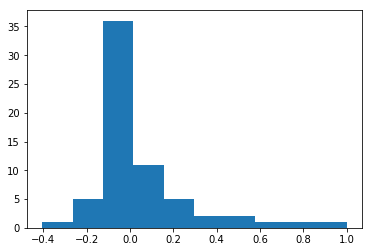

In [357]:
explanations_df = pd.DataFrame(explanations_nparray_dict['LOC'],
                               columns=[id_to_morpho_tag[idx] for idx in range(len(id_to_morpho_tag))])
morpho_tags_corr_loc = explanations_df.corr()
plt.hist(morpho_tags_corr_loc.iloc[5])

In [81]:
indexed_Cs['ORG'][0]

array([[-1,  1,  1, ...,  0,  0,  1],
       [ 1, -1,  1, ...,  0,  0,  1],
       [ 1,  1, -1, ...,  0,  0,  1],
       ...,
       [ 1,  1,  1, ...,  0,  0,  1],
       [ 1,  1,  1, ...,  0,  0,  1],
       [ 1,  1,  1, ...,  0,  0, -1]])

In [ ]:
indexed_Cs['ORG'][0][1]

In [ ]:
indexed_Cs['ORG'][0][2]

In [ ]:
indexed_Cs['ORG'][0][3]

In [ ]:
indexed_Cs['ORG'][0][4]

In [ ]:
indexed_Cs['ORG'][0][5]

In [ ]:
indexed_Cs['ORG'][0][10]

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(zero_centered_Ps['ORG'], cmap="PiYG", vmin=-0.5, vmax=0.5)
plt.colorbar()

In [ ]:
plt.imshow(zero_centered_Ps['PER'])
plt.colorbar()

In [ ]:
a = np.array(range(10))

In [ ]:
np.concatenate((a, a))